In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from loader import load_as_df
from clustering.add_class_to_data import CLUSTERS_ADDED

In [51]:
model = joblib.load('models/rf_balanced_no_vwc_2022_50.pkl')

In [52]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

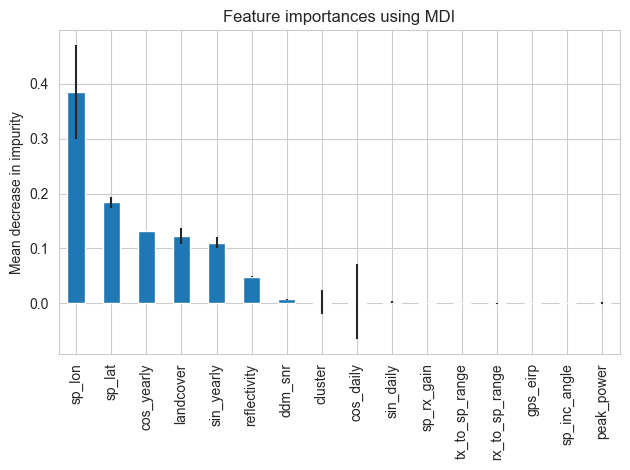

In [54]:


headers = list(load_as_df('20220101', '20220101').drop(columns=['timestamp_lst', 'rounded_timestamps', 'soil_moisture', 'vegetation_water_content'] + [elem for elem in CLUSTERS_ADDED if elem != '7']).columns)
headers = list(map(lambda x: x.replace('7', 'cluster'), headers))
forest_importances = pd.Series(importances, index=headers).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig('../figures/random_forest/features_importance.svg')

In [55]:
forest_importances

sp_lon            0.384867
sp_lat            0.184063
cos_yearly        0.132014
landcover         0.122775
sin_yearly        0.110552
reflectivity      0.048834
ddm_snr           0.007284
cluster           0.003118
cos_daily         0.003054
sin_daily         0.002728
sp_rx_gain        0.000363
tx_to_sp_range    0.000099
rx_to_sp_range    0.000092
gps_eirp          0.000081
sp_inc_angle      0.000076
peak_power        0.000000
dtype: float64

In [41]:
std

array([0.07023856, 0.03705535, 0.0162336 , 0.        , 0.00554491,
       0.00626811, 0.00046763, 0.00040779, 0.00926288, 0.06207152,
       0.00447042, 0.00017105, 0.00035999, 0.0010205 , 0.00018613,
       0.00024703, 0.00254523])

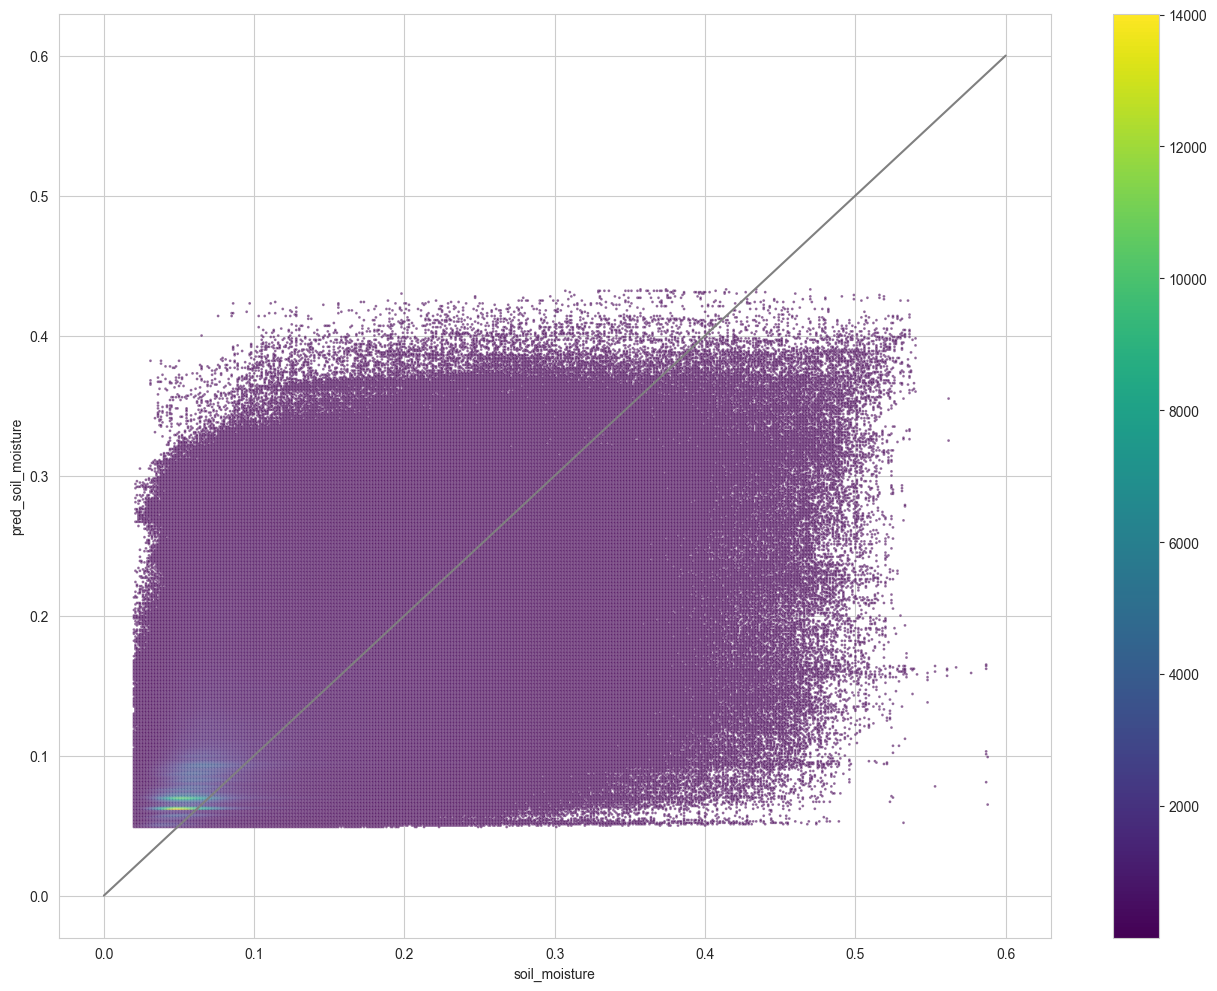

In [57]:
df_rf_2023 = pd.read_csv('../data/predictions/rf_balanced_no_vwc_2023.csv')
df = (
    df_rf_2023
    .eval('soil_moisture = soil_moisture.round(3)')
    .eval('pred_soil_moisture = pred_soil_moisture.round(3)')
    .groupby(['soil_moisture', 'pred_soil_moisture'])
    .agg(c=('lat', 'count'))
    .reset_index()
)

plt.figure(figsize=(8*2, 6*2))
ax = sns.scatterplot(x='soil_moisture', y='pred_soil_moisture', data=df, hue='c', palette='viridis', alpha=0.6, s=4, legend=False)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=df['c'].min(), vmax=df['c'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
plt.plot([0, 0.6], [0, 0.6], color='grey', linestyle='-')

plt.savefig('../figures/random_forest/rf_balanced_no_vwc_2023_target_vs_pred.png')

C:\Users\akoos\AppData\Local\Temp\ipykernel_30828\1135562062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rf_2023.soil_moisture, kde=True, bins=150, label='target')
C:\Users\akoos\AppData\Local\Temp\ipykernel_30828\1135562062.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rf_20

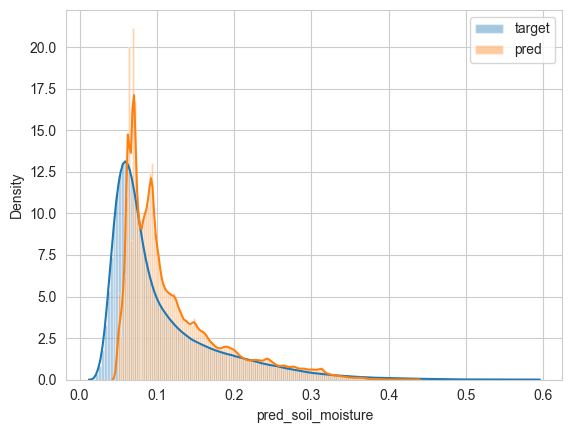

In [58]:
# Plot the distribution of the variable smap_sm_d
sns.distplot(df_rf_2023.soil_moisture, kde=True, bins=150, label='target')
sns.distplot(df_rf_2023.pred_soil_moisture, kde=True, bins=150, label='pred')
plt.legend()
plt.savefig('../figures/random_forest/rf_balanced_no_vwc_kde_2023_target_vs_pred.svg')

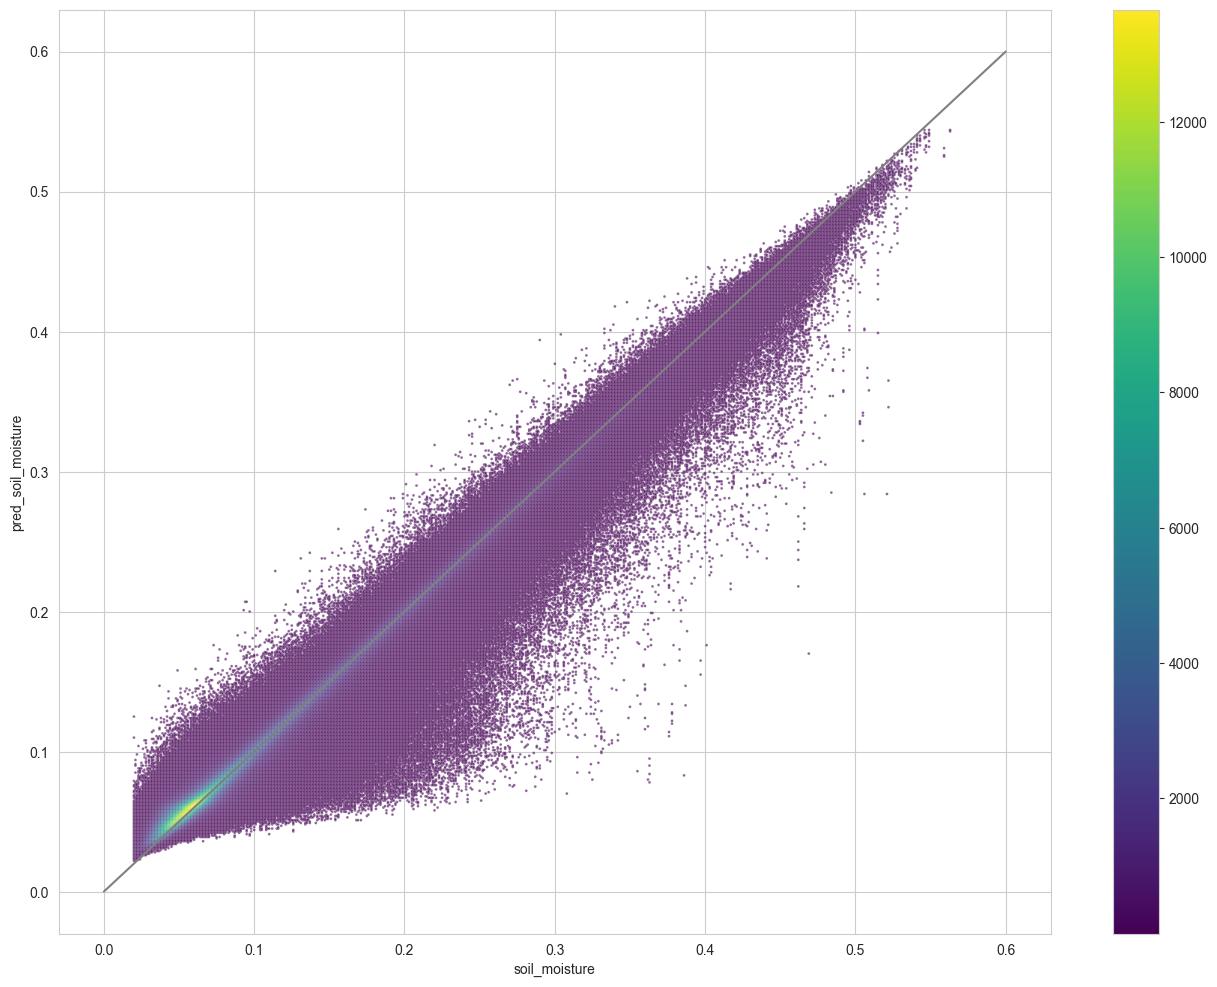

In [47]:
df_rf_2022 = pd.read_csv('../data/predictions/rf_2022.csv')
df = (
    df_rf_2022
    .eval('soil_moisture = soil_moisture.round(3)')
    .eval('pred_soil_moisture = pred_soil_moisture.round(3)')
    .groupby(['soil_moisture', 'pred_soil_moisture'])
    .agg(c=('lat', 'count'))
    .reset_index()
)

plt.figure(figsize=(8*2, 6*2))
ax = sns.scatterplot(x='soil_moisture', y='pred_soil_moisture', data=df, hue='c', palette='viridis', alpha=0.6, s=4, legend=False)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=df['c'].min(), vmax=df['c'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
plt.plot([0, 0.6], [0, 0.6], color='grey', linestyle='-')

plt.savefig('../figures/random_forest/rf_2022_target_vs_pred.png')

C:\Users\akoos\AppData\Local\Temp\ipykernel_30828\231620845.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rf_2022.soil_moisture, kde=True, bins=150, label='target')
C:\Users\akoos\AppData\Local\Temp\ipykernel_30828\231620845.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rf_2022

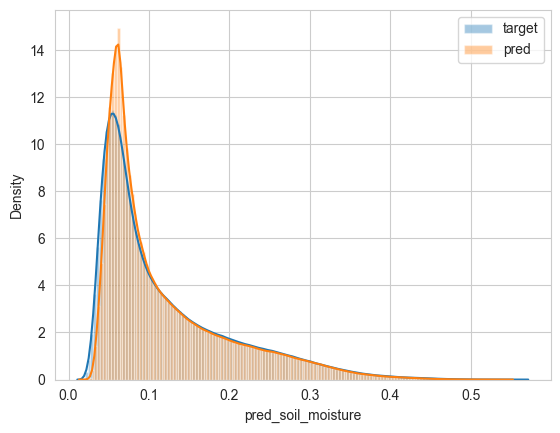

In [48]:
# Plot the distribution of the variable smap_sm_d
sns.distplot(df_rf_2022.soil_moisture, kde=True, bins=150, label='target')
sns.distplot(df_rf_2022.pred_soil_moisture, kde=True, bins=150, label='pred')
plt.legend()
plt.savefig('../figures/random_forest/rf_kde_2022_target_vs_pred.svg')

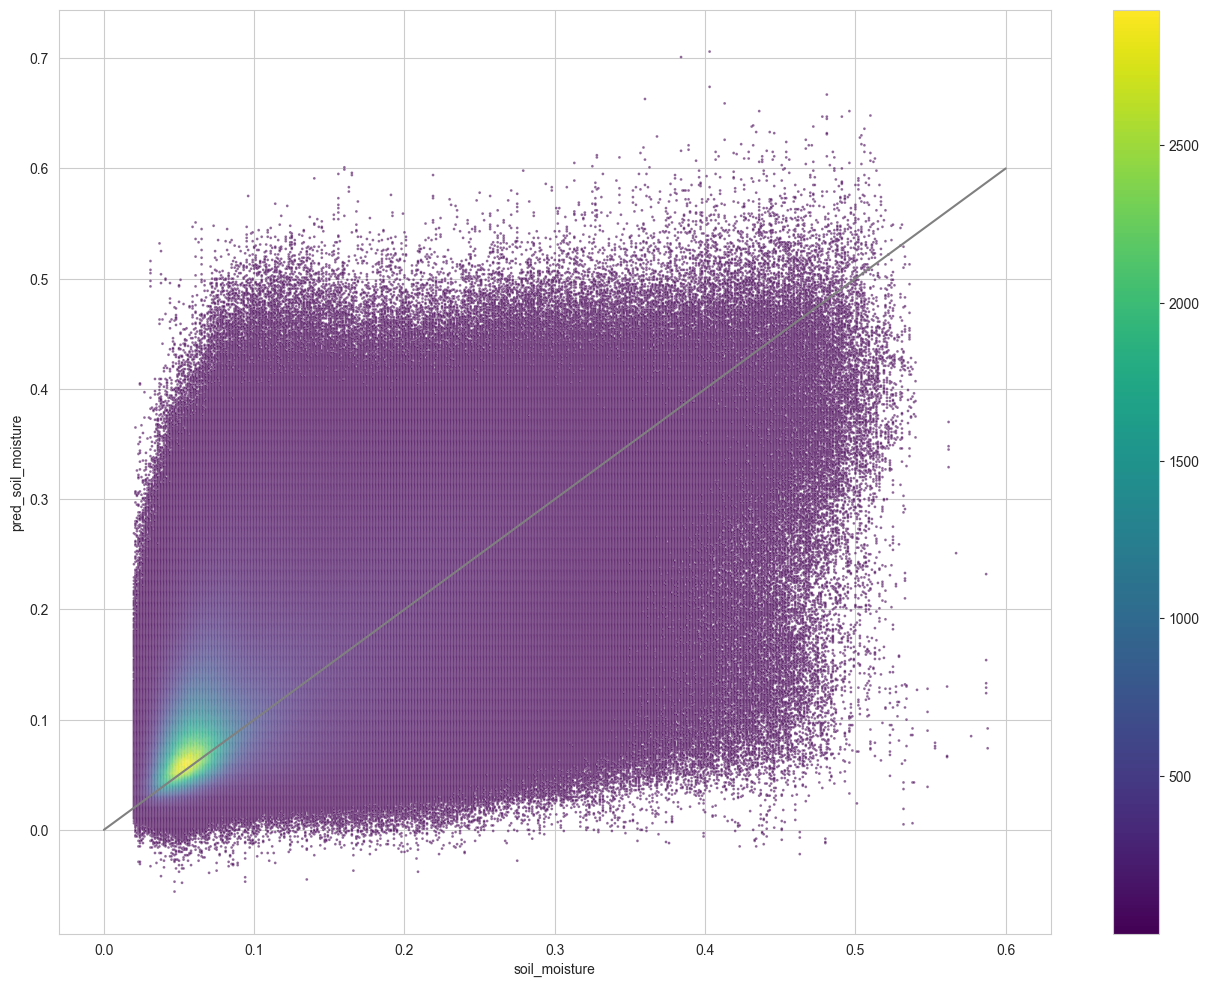

In [22]:
df_xgb_2023 = pd.read_csv('../data/predictions/xgb.csv')

df = (
    df_xgb_2023
    .eval('soil_moisture = soil_moisture.round(3)')
    .eval('pred_soil_moisture = pred_soil_moisture.round(3)')
    .groupby(['soil_moisture', 'pred_soil_moisture'])
    .agg(c=('lat', 'count'))
    .reset_index()
)

plt.figure(figsize=(8*2, 6*2))
ax = sns.scatterplot(x='soil_moisture', y='pred_soil_moisture', data=df, hue='c', palette='viridis', alpha=0.6, s=4, legend=False)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=df['c'].min(), vmax=df['c'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
plt.plot([0, 0.6], [0, 0.6], color='grey', linestyle='-')

plt.savefig('../figures/xgb/xgb_2023_target_vs_pred.png')

C:\Users\akoos\AppData\Local\Temp\ipykernel_30828\1806071311.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_xgb_2023.soil_moisture, kde=True, bins=150, label='target')
C:\Users\akoos\AppData\Local\Temp\ipykernel_30828\1806071311.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_xgb_

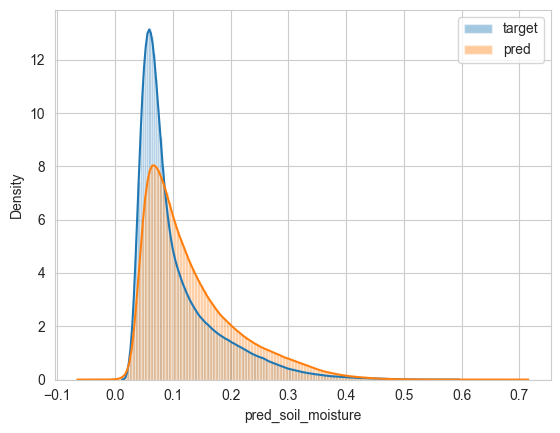

In [23]:
# Plot the distribution of the variable smap_sm_d
sns.distplot(df_xgb_2023.soil_moisture, kde=True, bins=150, label='target')
sns.distplot(df_xgb_2023.pred_soil_moisture, kde=True, bins=150, label='pred')
plt.legend()
plt.savefig('../figures/xgb/xgb_kde_2023_target_vs_pred.svg')

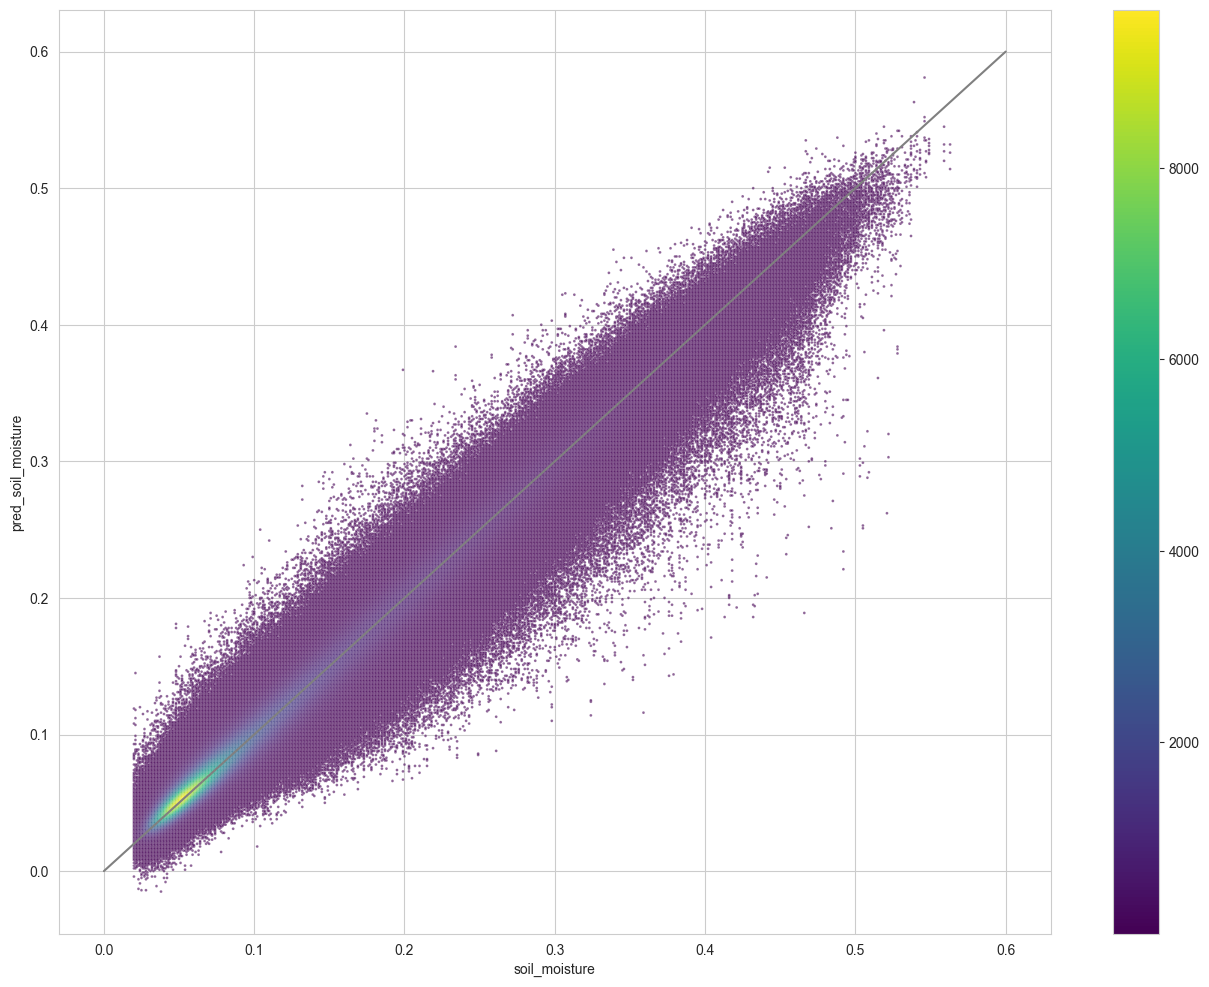

In [49]:
df_xgb_2022 = pd.read_csv('../data/predictions/xgb_2022.csv')

df = (
    df_xgb_2022
    .eval('soil_moisture = soil_moisture.round(3)')
    .eval('pred_soil_moisture = pred_soil_moisture.round(3)')
    .groupby(['soil_moisture', 'pred_soil_moisture'])
    .agg(c=('lat', 'count'))
    .reset_index()
)

plt.figure(figsize=(8*2, 6*2))
ax = sns.scatterplot(x='soil_moisture', y='pred_soil_moisture', data=df, hue='c', palette='viridis', alpha=0.6, s=4, legend=False)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=df['c'].min(), vmax=df['c'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
plt.plot([0, 0.6], [0, 0.6], color='grey', linestyle='-')

plt.savefig('../figures/xgb/xgb_2022_target_vs_pred.png')

C:\Users\akoos\AppData\Local\Temp\ipykernel_30828\3185244525.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_xgb_2022.soil_moisture, kde=True, bins=150, label='target')
C:\Users\akoos\AppData\Local\Temp\ipykernel_30828\3185244525.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_xgb_

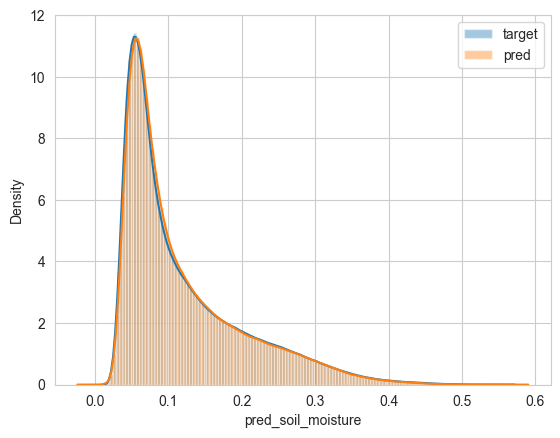

In [50]:
# Plot the distribution of the variable smap_sm_d
sns.distplot(df_xgb_2022.soil_moisture, kde=True, bins=150, label='target')
sns.distplot(df_xgb_2022.pred_soil_moisture, kde=True, bins=150, label='pred')
plt.legend()
plt.savefig('../figures/xgb/xgb_kde_2022_target_vs_pred.svg')

In [44]:
model_path = 'models/xgb_2022_1000.pkl'
xgb = joblib.load(model_path)

importances = xgb.feature_importances_
# std = np.std([tree.feature_importances_ for tree in xgb.estimators_], axis=0)


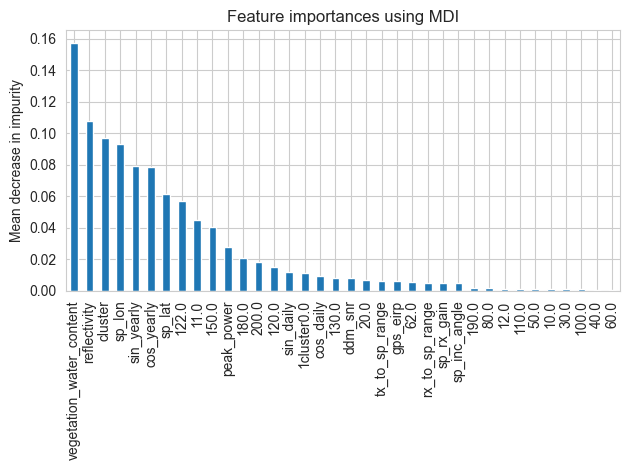

In [46]:
import json

with open('models/xgb_2022_1000.json') as f:
    headers = json.load(f)
    headers = list(map(lambda x: x.replace('7', 'cluster'), headers))
forest_importances = pd.Series(importances, index=headers).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig('../figures/xgb/features_importance.svg')